> # **Introduction**

Perkenalkan nama saya **Verindra Hernanda Putra**, nah notebook ini merupakan notebook dengan dataset yang saya ambil dari Kaggle yaitu "**Video Game Sales**", dengan harapan dataset ini bisa saya gunakan dengan baik dari **Week 1** sampai **Week 5** dalam kegiatan **Rekruitasi MBC Laboratory**

**TASK :** Regression Data - Prediksi Harga

In [1]:
# CaAs_Verindra Hernanda Putra - 1303223055

# Import Library

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

> # **EDA - Exploratory Data Analysis**

In [2]:
# Panggil Dataset
df = pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")

In [3]:
# Tampilkan tabel
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


**Analisis Dataset**

Jadi dataset ini merupakan dataset yang berisi **kumpulan data dengan bermacam fitur, termasuk luas persegi, kamar tidur, kamar mandi, tipe lingkungan, dan tahun pembangunan serta target data yaitu harga rumah**

Data-data kolom yang ada dalam dataset ini adalah : 
* **SquareFeet :** Kaki Persegi rumah
* **Bedrooms :** Jumlah kamar tidur
* **Bathrooms :** Jumlah kamar mandi
* **Neighborhood :** Lingkungan sekitar rumah itu berada
* **YearBuilt :** Tahun rumah dibangun
* **Price :** Harga rumah

**Total Kolom = 6 | Total Baris = 50000**



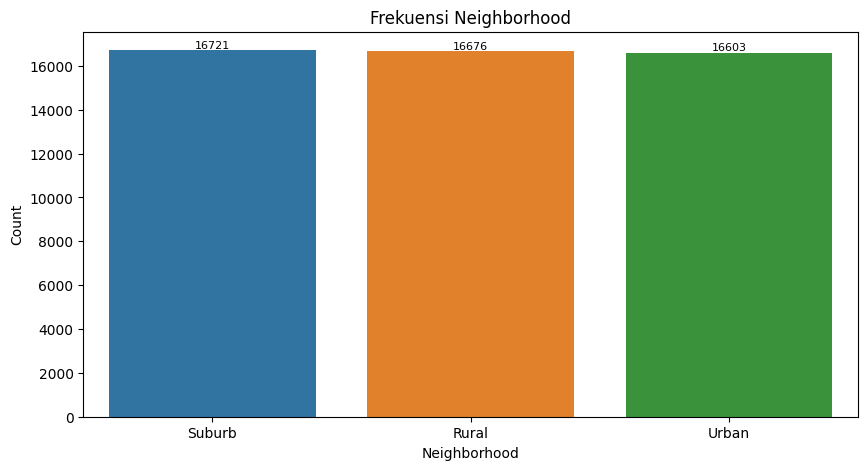

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [4]:
# Visualisasi Data ( Year )
hitung_neighborhood = df['Neighborhood'].value_counts()

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x=hitung_neighborhood.index, y=hitung_neighborhood.values)
barplot.bar_label(barplot.containers[0], fontsize=8);
plt.title('Frekuensi Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks()
plt.show()

df['Neighborhood'].unique()

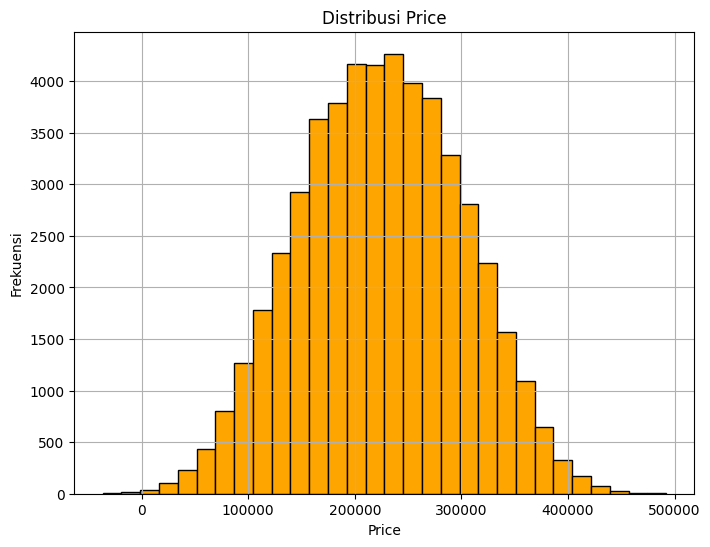

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='orange', edgecolor='black')
plt.title('Distribusi Price')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [6]:
# Cek missing values
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [7]:
#  Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


> # **Data Cleansing**

In [8]:
# Ubah tipe data
df['Price'] = df['Price'].astype(int)

In [9]:
# Tampilkan tabel
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355
1,2459,3,2,Rural,1980,195014
2,1860,2,1,Suburb,1970,306891
3,2294,2,1,Urban,1996,206786
4,2130,5,2,Suburb,2001,272436
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080
49996,2854,2,2,Suburb,1988,374507
49997,2979,5,3,Suburb,1962,384110
49998,2596,5,2,Rural,1984,380512


> # **Data Preprocessing**

In [10]:
df['SquareFeet'].unique()

array([2126, 2459, 1860, ..., 2864, 2330, 2084])

In [11]:
df['Bedrooms'].unique()

array([4, 3, 2, 5])

In [12]:
df['Bathrooms'].unique()

array([1, 2, 3])

In [13]:
df['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [14]:
df['YearBuilt'].unique()

array([1969, 1980, 1970, 1996, 2001, 2020, 1993, 1957, 1959, 2004, 1951,
       1987, 1992, 1989, 1976, 1956, 1977, 1979, 1962, 1999, 1978, 1963,
       2013, 2002, 1952, 2014, 1965, 2006, 2008, 1982, 1966, 1971, 2021,
       1960, 2016, 2007, 1994, 1988, 2000, 2015, 1983, 1961, 1972, 2017,
       1985, 1975, 2012, 2019, 1995, 1986, 1981, 1954, 1958, 2005, 1984,
       1997, 2003, 1964, 2018, 1953, 1968, 1955, 1967, 1950, 1998, 1991,
       2010, 1973, 2011, 1990, 1974, 2009])

In [15]:
# Ambil kolom fitur
kategorikal_data = df['Neighborhood']
numerikal_data = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']]

In [16]:
# One-hot encoding
kategorikal_data = pd.get_dummies(kategorikal_data).astype(int)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
prices = df['Price']

In [19]:
scaler = StandardScaler()

In [20]:
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [21]:
scaled_prices

array([[-0.12439838],
       [-0.3915472 ],
       [ 1.07779103],
       ...,
       [ 2.0919479 ],
       [ 2.04469351],
       [-0.04214317]])

In [22]:
kategorikal_data

,Rural,Suburb,Urban
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
49995,1,0,0
49996,0,1,0
49997,0,1,0
49998,1,0,0


> # **Modelling**

In [23]:
# Import Library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Pisahkan variabel fitur dengan variabel target
X = pd.concat([kategorikal_data, numerikal_data], axis=1)
Y = df['Price']

In [25]:
X

,Rural,Suburb,Urban,SquareFeet,Bedrooms,Bathrooms,YearBuilt
0,1,0,0,2126,4,1,1969
1,1,0,0,2459,3,2,1980
2,0,1,0,1860,2,1,1970
3,0,0,1,2294,2,1,1996
4,0,1,0,2130,5,2,2001
...,...,...,...,...,...,...,...
49995,1,0,0,1282,5,3,1975
49996,0,1,0,2854,2,2,1988
49997,0,1,0,2979,5,3,1962
49998,1,0,0,2596,5,2,1984


In [26]:
# Pisahkan data menjadi train dan test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# Melatih Model Regression
model = LinearRegression()
model = model.fit(X_train, Y_train)

In [28]:
model.score(X_train, Y_train)

0.5688922008119348

In [29]:
# Prediksi Test
Y_pred = model.predict(X_test)

In [30]:
print(Y_pred)

[218328.98824436 135024.53577193 255260.32886374 ... 310674.73762015
 200903.61356623 244037.34852069]


> # **Evaluation**

In [31]:
# Evaluasi Model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: ", mse)
print(f"R-squared: ", r2)

Mean Squared Error:  2436249404.0238967
R-squared:  0.5755628291469783


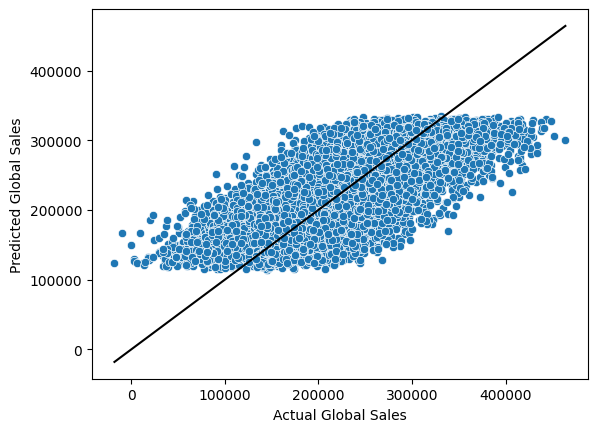

In [32]:
# Scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(),Y_test.max()], [Y_test.min(),Y_test.max()], 'k-')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.show()